In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
df_2022 = pd.read_csv("kaggle_survey_2022_responses.csv")
df_2021 = pd.read_csv("kaggle_survey_2021_responses.csv")
df_2020 = pd.read_csv("kaggle_survey_2020_responses.csv")

C:\Users\HYQ\AppData\Local\Temp\ipykernel_9600\3403911719.py:6: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv("kaggle_survey_2022_responses.csv")
C:\Users\HYQ\AppData\Local\Temp\ipykernel_9600\3403911719.py:7: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv("kaggle_survey_2021_responses.csv")
C:\Users\HYQ\AppData\Local\Temp\ipykernel_9600\3403911719.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020 = pd.read_csv("kaggle_survey_2020_responses.csv")


In [2]:
import streamlit as st

# 1.Preprocess

## 1.1 Get the data

In [3]:
# Get the questions' titles
question_title_2020 =  df_2020[0:1]
question_title_2021 =  df_2021[0:1]
question_title_2022 =  df_2022[0:1]

# add year column
df_2020['year'] = 2020
df_2021['year'] = 2021
df_2022['year'] = 2022

# # remove the first row, which is the question row
df_2020 = df_2020.iloc[1:]
df_2021 = df_2021.iloc[1:]
df_2022 = df_2022.iloc[1:]

In [4]:
df_2020.shape[0],df_2021.shape[0], df_2022.shape[0]

(20036, 25973, 23997)

## 1.2 Counstruct the combined dataset

In [5]:
# construct the combined dataset
data = pd.DataFrame()
data['completion_time'] = pd.concat([df_2020['Time from Start to Finish (seconds)'], df_2021['Time from Start to Finish (seconds)'], df_2022['Duration (in seconds)']]).astype('int')
data['year'] = pd.concat([df_2020['year'], df_2021['year'], df_2022['year']])
data['age'] = pd.concat([df_2020['Q1'], df_2021['Q1'], df_2022['Q2']])
data['gender'] = pd.concat([df_2020['Q2'], df_2021['Q2'], df_2022['Q3']])
data['region'] = pd.concat([df_2020['Q3'], df_2021['Q3'], df_2022['Q4']])
data['highest_edu_lv'] = pd.concat([df_2020['Q4'], df_2021['Q4'], df_2022['Q8']]) #What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

#occupation
data['role_title'] = pd.concat([df_2020['Q5'], df_2021['Q5'], df_2022['Q23']]) # Select the title most similar to your current role (or most recent title if retired): - Selected Choice
data['salary'] = pd.concat([df_2020['Q24'], df_2021['Q25'], df_2022['Q29']]) #What is your current yearly compensation (approximate $USD)?
data['company_size'] = pd.concat([df_2020['Q20'], df_2021['Q21'], df_2022['Q25']]) #What is the size of the company where you are employed?
#data['industry'] = pd.concat([df_2020['Q19'], df_2021['Q20'], df_2022['Q24']]) #2020 no data
  #important activity
data['do_analyze_data'] = pd.concat([df_2020['Q23_Part_1'], df_2021['Q24_Part_1'], df_2022['Q28_1']]).fillna(0).astype(bool).astype(int)
data['do_build_data_infra'] = pd.concat([df_2020['Q23_Part_2'], df_2021['Q24_Part_2'], df_2022['Q28_2']]).fillna(0).astype(bool).astype(int)
data['do_build_ml_prototypes'] = pd.concat([df_2020['Q23_Part_3'], df_2021['Q24_Part_3'], df_2022['Q28_3']]).fillna(0).astype(bool).astype(int)
data['do_build_ml_service'] = pd.concat([df_2020['Q23_Part_4'], df_2021['Q24_Part_4'], df_2022['Q28_4']]).fillna(0).astype(bool).astype(int)
data['do_experiment_ml_models'] = pd.concat([df_2020['Q23_Part_5'], df_2021['Q24_Part_5'], df_2022['Q28_5']]).fillna(0).astype(bool).astype(int)
data['do_ml_research'] = pd.concat([df_2020['Q23_Part_6'], df_2021['Q24_Part_6'], df_2022['Q28_6']]).fillna(0).astype(bool).astype(int)
data['do_none'] = pd.concat([df_2020['Q23_Part_7'], df_2021['Q24_Part_7'], df_2022['Q28_7']]).fillna(0).astype(bool).astype(int)
data['do_other'] = pd.concat([df_2020['Q23_OTHER'], df_2021['Q24_OTHER'], df_2022['Q28_8']]).fillna(0).astype(bool).astype(int)

# programming skill
data['year_of_coding'] = pd.concat([df_2020['Q6'], df_2021['Q6'], df_2022['Q11']])
  # programming language
data['use_python'] = pd.concat([df_2020['Q7_Part_1'], df_2021['Q7_Part_1'], df_2022['Q12_1']]).fillna(0).astype(bool).astype(int)
data['use_r'] = pd.concat([df_2020['Q7_Part_2'], df_2021['Q7_Part_2'], df_2022['Q12_2']]).fillna(0).astype(bool).astype(int)
data['use_sql'] = pd.concat([df_2020['Q7_Part_3'], df_2021['Q7_Part_3'], df_2022['Q12_3']]).fillna(0).astype(bool).astype(int)
data['use_c'] = pd.concat([df_2020['Q7_Part_4'], df_2021['Q7_Part_4'], df_2022['Q12_4']]).fillna(0).astype(bool).astype(int)
data['use_python'] = pd.concat([df_2020['Q7_Part_1'], df_2021['Q7_Part_1'], df_2022['Q12_1']]).fillna(0).astype(bool).astype(int)
data['use_c++'] = pd.concat([df_2020['Q7_Part_5'], df_2021['Q7_Part_5'], df_2022['Q12_6']]).fillna(0).astype(bool).astype(int)
data['use_java'] = pd.concat([df_2020['Q7_Part_6'], df_2021['Q7_Part_6'], df_2022['Q12_7']]).fillna(0).astype(bool).astype(int)
data['use_javascript'] = pd.concat([df_2020['Q7_Part_7'], df_2021['Q7_Part_7'], df_2022['Q12_8']]).fillna(0).astype(bool).astype(int)
data['use_julia'] = pd.concat([df_2020['Q7_Part_8'], df_2021['Q7_Part_8'], df_2022['Q12_9']]).fillna(0).astype(bool).astype(int)
data['use_bash'] = pd.concat([df_2020['Q7_Part_10'], df_2021['Q7_Part_10'], df_2022['Q12_9']]).fillna(0).astype(bool).astype(int)
data['use_matlab'] = pd.concat([df_2020['Q7_Part_11'], df_2021['Q7_Part_11'], df_2022['Q12_11']]).fillna(0).astype(bool).astype(int)
data['use_none'] = pd.concat([df_2020['Q7_Part_12'], df_2021['Q7_Part_12'], df_2022['Q12_14']]).fillna(0).astype(bool).astype(int)
data['use_other'] = pd.concat([df_2020['Q7_OTHER'], df_2021['Q7_OTHER'], df_2022['Q12_15']]).fillna(0).astype(bool).astype(int)

# ML skill
data['year_of_ml'] = pd.concat([df_2020['Q15'], df_2021['Q15'], df_2022['Q16']]) #For how many years have you used machine learning methods?
  #ML framework
data['ml_use_scikit_learn'] = pd.concat([df_2020['Q16_Part_1'], df_2021['Q16_Part_1'], df_2022['Q17_1']]).fillna(0).astype(bool).astype(int)
data['ml_use_tensorflow'] = pd.concat([df_2020['Q16_Part_2'], df_2021['Q16_Part_2'], df_2022['Q17_2']]).fillna(0).astype(bool).astype(int)
data['ml_use_keras'] = pd.concat([df_2020['Q16_Part_3'], df_2021['Q16_Part_3'], df_2022['Q17_3']]).fillna(0).astype(bool).astype(int)
data['ml_use_pytorch'] = pd.concat([df_2020['Q16_Part_4'], df_2021['Q16_Part_4'], df_2022['Q17_4']]).fillna(0).astype(bool).astype(int)
data['ml_use_fastai'] = pd.concat([df_2020['Q16_Part_5'], df_2021['Q16_Part_5'], df_2022['Q17_5']]).fillna(0).astype(bool).astype(int)
data['ml_use_xgboost'] = pd.concat([df_2020['Q16_Part_7'], df_2021['Q16_Part_7'], df_2022['Q17_6']]).fillna(0).astype(bool).astype(int)
data['ml_use_lightgbm'] = pd.concat([df_2020['Q16_Part_8'], df_2021['Q16_Part_8'], df_2022['Q17_7']]).fillna(0).astype(bool).astype(int)
data['ml_use_catboost'] = pd.concat([df_2020['Q16_Part_9'], df_2021['Q16_Part_9'], df_2022['Q17_8']]).fillna(0).astype(bool).astype(int)
data['ml_use_caret'] = pd.concat([df_2020['Q16_Part_12'], df_2021['Q16_Part_12'], df_2022['Q17_9']]).fillna(0).astype(bool).astype(int)
data['ml_use_tidymodels'] = pd.concat([df_2020['Q16_Part_13'], df_2021['Q16_Part_13'], df_2022['Q17_10']]).fillna(0).astype(bool).astype(int)
data['ml_use_jax'] = pd.concat([df_2020['Q16_Part_14'], df_2021['Q16_Part_14'], df_2022['Q17_11']]).fillna(0).astype(bool).astype(int)
#data['ml_use_pytorch_lightning'] = pd.concat([df_2020['Q16_Part_15'], df_2021['Q16_Part_15'], df_2022['Q17_12']]).fillna(0).astype(bool).astype(int)
# data['ml_use_huggingface'] = pd.concat([df_2020[''], df_2021['Q16_Part_16'], df_2022['Q17_13']]).fillna(0).astype(bool).astype(int)
data['ml_use_none'] = pd.concat([df_2020['Q16_Part_15'], df_2021['Q16_Part_17'], df_2022['Q17_14']]).fillna(0).astype(bool).astype(int)
data['ml_use_other'] = pd.concat([df_2020['Q16_OTHER'], df_2021['Q16_OTHER'], df_2022['Q17_15']]).fillna(0).astype(bool).astype(int)

data

,completion_time,year,age,gender,region,highest_edu_lv,role_title,salary,company_size,do_analyze_data,...,ml_use_pytorch,ml_use_fastai,ml_use_xgboost,ml_use_lightgbm,ml_use_catboost,ml_use_caret,ml_use_tidymodels,ml_use_jax,ml_use_none,ml_use_other
1,1838,2020,35-39,Man,Colombia,Doctoral degree,Student,NaN,NaN,0,...,0,0,1,0,0,0,0,0,0,0
2,289287,2020,30-34,Man,United States of America,Master’s degree,Data Engineer,"100,000-124,999","10,000 or more employees",1,...,1,0,0,0,0,0,0,0,0,0
3,860,2020,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,"15,000-19,999","1000-9,999 employees",0,...,0,0,0,0,0,0,0,0,0,0
4,507,2020,30-34,Man,United States of America,Master’s degree,Data Scientist,"125,000-149,999",250-999 employees,1,...,0,0,1,0,0,0,0,0,0,0
5,78,2020,30-34,Man,Japan,Master’s degree,Software Engineer,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,331,2022,22-24,Man,United States of America,Master’s degree,NaN,NaN,NaN,0,...,1,0,1,0,0,0,0,0,0,0
23994,330,2022,60-69,Man,United States of America,Bachelor’s degree,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,1,0
23995,860,2022,25-29,Man,Turkey,Master’s degree,Engineer (non-software),"25,000-29,999","10,000 or more employees",0,...,0,0,1,1,1,0,0,0,0,0
23996,597,2022,35-39,Woman,Israel,Doctoral degree,Research Scientist,"15,000-19,999",0-49 employees,0,...,0,0,0,0,0,0,0,0,0,0


# 2. Data Cleaning

## 2.1 Drop the data

In [6]:
# filter out non-male or non-female
data = data[data['gender'].isin(['Man', 'Woman'])]
# filter out student and unemployed
data = data[~data['role_title'].isin(['Student', 'Currently not employed'])]
# filter out people without typing salary
data = data[~data['salary'].isna()]
# filter out duration less than 1 min
data = data[data['completion_time']>=60]

## 2.2 Label mapping

In [7]:
map_year_of_coding = {
    "I have never written code": "1. 0 years",
    "< 1 years": "2. < 1 years",
    "1-2 years": "3. 1-3 years",
    "1-3 years": "3. 1-3 years",
    "3-5 years": "4. 3-5 years",
    "5-10 years": "5. 5-10 years",
    "10-20 years": "6. 10-20 years",
    "20+ years": "7. 20+ years",
    np.nan: "1. 0 years"
}

map_year_of_coding_int = {
    "I have never written code": 0,
    "< 1 years": 1,
    "1-2 years": 3,
    "1-3 years": 3,
    "3-5 years": 5,
    "5-10 years": 10,
    "10-20 years": 20,
    "20+ years": 30,
    np.nan: 0
}

map_year_of_ml = {
    "I do not use machine learning methods": "1. 0 years",
    "Under 1 year": "2. < 1 years",
    "1-2 years": "3. 1-3 years",
    "1-3 years": "3. 1-3 years",
    "2-3 years": "4. 2-3 years",
    "3-4 years": "5. 3-4 years",
    "4-5 years": "6. 4-5 years",
    "5-10 years": "7. 5-10 years",
    "10-20 years": "8. 10-20 years",
    "20+ years": "9. 20+ years",
    "20 or more years": "9. 20+ years",
    np.nan: "1. 0 years"
}

map_year_of_ml_int = {
    'I do not use machine learning methods': 0,
    '3-4 years': 4,
    '2-3 years': 3,
    'Under 1 year': 1,
    '4-5 years': 5,
    '1-2 years': 2,
    '5-10 years': 10,
    '20 or more years': 30,
    '10-20 years': 20,
    np.nan: 0
}

map_age = {
    '30-34': 34,
    '35-39': 39,
    '22-24': 24,
    '55-59': 59,
    '50-54': 54,
    '25-29': 29,
    '18-21': 21,
    '40-44': 44,
    '60-69': 69,
    '45-49': 49,
    '70+': 70
}

map_gender = {
    "Man": 1,
    "Woman": 0,
    np.nan: np.nan
}

map_region = {
    "United Kingdom of Great Britain and Northern Ireland": "UK",
    np.nan: np.nan
}

job_title_mapping = {
    'Data Engineer': 'Data Engineer',
    'Software Engineer': 'Software Engineer',
    'Data Scientist': 'Data Scientist',
    'Data Analyst': 'Data Analyst',
    'Research Scientist': 'Research Scientist',
    'Other': 'Other',
    'Statistician': 'Statistician',
    'Product/Project Manager': 'Manager',
    'Machine Learning Engineer': 'Machine Learning Engineer',
    'Business Analyst': 'Business Analyst',
    'DBA/Database Engineer': 'DBA/Database Engineer',
    'Program/Project Manager': 'Manager',
    'Product Manager': 'Manager',
    'Developer Relations/Advocacy': 'Developer Relations/Advocacy',
    'Developer Advocate': 'Developer Advocate',
    'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 'Data Analyst',
    'Machine Learning/ MLops Engineer': 'Machine Learning Engineer',
    'Engineer (non-software)': 'Engineer (non-software)',
    'Teacher / professor': 'Teacher / professor',
    'Manager (Program, Project, Operations, Executive-level, etc)': 'Manager',
    'Data Administrator': 'Data Administrator',
    'Data Architect': 'Data Architect',
    np.nan: np.nan
}

map_company_size_int = {
    "0-49 employees": 49,
    "50-249 employees": 249,
    "250-999 employees": 999,
    "1000-9,999 employees": 9999,
    "10,000 or more employees": 15000,
    np.nan: np.nan
}

education_mapping = {
    'Master’s degree': "2. Master's degree",
    'Bachelor’s degree': '1. Bachelor’s degree',
    'Doctoral degree': "3. Doctoral degree",
    'Some college/university study without earning a bachelor’s degree': '0. Unfinished bachelor’s degree',
    'Professional degree': 'Other',
    'I prefer not to answer': 'Other',
    'No formal education past high school': 'Other',
    'Professional doctorate': 'Other',
    np.nan: np.nan
}

salary_mapping = {
    '0-999': '<5000',
    '1,000-1,999': '<5000',
    '2,000-2,999': '<5000',
    '3,000-3,999': '<5000',
    '4,000-4,999': '<5000',
    '5,000-7,499': '5,000-9,999',
    '7,500-9,999': '5,000-9,999',
    '10,000-14,999': '10,000-29,999',
    '15,000-19,999': '10,000-29,999',
    '20,000-24,999': '10,000-29,999',
    '25,000-29,999': '10,000-29,999',
    '30,000-39,999': '30,000-49,999',
    '40,000-49,999': '30,000-49,999',
    '50,000-59,999': '50,000-69,999',
    '60,000-69,999': '50,000-69,999',
    '70,000-79,999': '70,000-99,999',
    '80,000-89,999': '70,000-99,999',
    '90,000-99,999': '70,000-99,999',
    '100,000-124,999': '100,000-149,999',
    '125,000-149,999': '100,000-149,999',
    '150,000-199,999': '150,000-249,999',
    '200,000-249,999': '150,000-249,999',
    '250,000-299,999': '250,000-499,999',
    '300,000-499,999': '250,000-499,999',
    '300,000-500,000': '250,000-499,999',
    '500,000-999,999': '>500,000',
    '> 500,000': '>500,000',
    '>1,000,000': '>500,000',
    np.nan: np.nan
}

salary_mapping_int = {
    '0-999': 500,
    '1,000-1,999': 1500,
    '2,000-2,999': 2500,
    '3,000-3,999': 3500,
    '4,000-4,999': 4500,
    '5,000-7,499': 6250,
    '7,500-9,999': 8750,
    '10,000-14,999': 12500,
    '15,000-19,999': 17500,
    '20,000-24,999': 22500,
    '25,000-29,999': 27500,
    '30,000-39,999': 35000,
    '40,000-49,999': 45000,
    '50,000-59,999': 55000,
    '60,000-69,999': 65000,
    '70,000-79,999': 75000,
    '80,000-89,999': 85000,
    '90,000-99,999': 95000,
    '100,000-124,999': 112500,
    '125,000-149,999': 137500,
    '150,000-199,999': 175000,
    '200,000-249,999': 225000,
    '250,000-299,999': 275000,
    '300,000-499,999': 400000,
    '300,000-500,000': 400000,
    '500,000-999,999': 750000,
    '> 500,000': 750000,
    '>1,000,000': 750000,
    np.nan: np.nan
}


## 2.3 Column transform

In [8]:
data['age_int'] = data['age'].apply(lambda x : map_age[x])
data['gender_int'] = data['gender'].apply(lambda x : map_gender[x])
data['highest_edu_lv'] = data['highest_edu_lv'].apply(lambda x : education_mapping[x])
#salary
data['salary'] = data['salary'].str.replace('$', '')
data['salary_int'] = data['salary'].apply(lambda x : salary_mapping_int[x])
data['salary'] = data['salary'].apply(lambda x : salary_mapping[x])

#year_of_coding
data['year_of_coding_int'] = data['year_of_coding'].apply(lambda x : map_year_of_coding_int[x])
data['year_of_coding'] = data['year_of_coding'].apply(lambda x : map_year_of_coding[x])

#year_of_ml
data['year_of_ml_int'] = data['year_of_ml'].apply(lambda x : map_year_of_ml_int[x])
data['year_of_ml'] = data['year_of_ml'].apply(lambda x : map_year_of_ml[x])

# region
data['region'] = data['region'].apply(lambda x : map_region[x] if x in map_region else x)
most_popular_country = data.groupby('region').count().iloc[:,1].sort_values(ascending = False).head(10).keys()
data.loc[~data['region'].isin(most_popular_country), 'region'] = 'Other'
  # to dummy
dummy_df = pd.get_dummies(data['region'], prefix='region')
data = pd.concat([data, dummy_df], axis=1)

# role title
data['role_title'] = data['role_title'].apply(lambda x : job_title_mapping[x])
most_popular_job_title = data.groupby('role_title').count().iloc[:,1].sort_values(ascending = False).head(10).keys()
data.loc[~data['role_title'].isin(most_popular_job_title), 'role_title'] = 'Other'
  # to dummy
dummy_df = pd.get_dummies(data['role_title'], prefix='role_title')
data = pd.concat([data, dummy_df], axis=1)

# highest education level
most_popular_edu_lv = data.groupby('highest_edu_lv').count().iloc[:,1].sort_values(ascending = False).head(4).keys()
data.loc[~data['highest_edu_lv'].isin(most_popular_edu_lv), 'highest_edu_lv'] = 'Other'
  # to dummy
dummy_df = pd.get_dummies(data['highest_edu_lv'], prefix='highest_edu_lv')
data = pd.concat([data, dummy_df], axis=1)

#company size
data['company_size'] = data['company_size'].apply(lambda x : map_company_size_int[x] if x in map_company_size_int else x)

C:\Users\HYQ\AppData\Local\Temp\ipykernel_9600\2836385649.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['salary'] = data['salary'].str.replace('$', '')


In [9]:
# check null
data.isna().sum().sort_values()

completion_time         0
region_India            0
region_Germany          0
region_Brazil           0
year_of_ml_int          0
                       ..
use_c                   0
use_sql                 0
use_r                   0
ml_use_fastai           0
highest_edu_lv_Other    0
Length: 73, dtype: int64

In [10]:
data.head()

,completion_time,year,age,gender,region,highest_edu_lv,role_title,salary,company_size,do_analyze_data,...,role_title_Machine Learning Engineer,role_title_Manager,role_title_Other,role_title_Research Scientist,role_title_Software Engineer,role_title_Teacher / professor,highest_edu_lv_1. Bachelor’s degree,highest_edu_lv_2. Master's degree,highest_edu_lv_3. Doctoral degree,highest_edu_lv_Other
2,289287,2020,30-34,Man,United States of America,2. Master's degree,Data Engineer,"100,000-149,999",15000,1,...,0,0,0,0,0,0,0,1,0,0
3,860,2020,35-39,Man,Other,1. Bachelor’s degree,Software Engineer,"10,000-29,999",9999,0,...,0,0,0,0,1,0,1,0,0,0
4,507,2020,30-34,Man,United States of America,2. Master's degree,Data Scientist,"100,000-149,999",999,1,...,0,0,0,0,0,0,0,1,0,0
9,762,2020,35-39,Man,Germany,3. Doctoral degree,Data Scientist,"70,000-99,999",9999,0,...,0,0,0,0,0,0,0,0,1,0
12,742,2020,35-39,Man,United States of America,3. Doctoral degree,Research Scientist,"30,000-49,999",49,1,...,0,0,0,1,0,0,0,0,1,0


# 3. Visualization

## 3.1 Helper function

In [11]:
#concat dummy col into one col

convert_dict = {
    'program_language': 'use', # start with use
    'role_activity': 'do',
    'machine_learning_lib': 'ml'
}

def dummy_to_col(data, feature, convert_dict):
  analysis_data = pd.DataFrame()
  cols = [col for col in data.columns if col.startswith(convert_dict[feature])]
  for col in cols:
    grp_col = ['gender']
    grp_col.append(col)
    plt_data = data.loc[data[col] == 1, ['year', 'gender', 'salary_int']]
    plt_data[feature] = col
    analysis_data = pd.concat([analysis_data, plt_data])
  return analysis_data

In [12]:

def plt_salary_gender(data, feature):
    fig, ax = plt.subplots(figsize=(14, 5))
    colors = {'Man': 'blue', 'Woman': 'orange'}
    sns.boxplot(x=feature, y='salary_int', data=data, hue='gender', ax=ax, order=sorted(data[feature].apply(str).unique()), showfliers=False, palette='deep', color = colors)
    ax.set_ylim((0, 300000))
    ax.set_title('Relationship of Salary and %s' % (feature))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.legend(loc='upper right')

    # Calculate the median values for each category and gender
    median_values = data.groupby([feature, 'gender'])['salary_int'].median().reset_index()

    # Calculate the percentage difference of salary between women and men
    gender_median = median_values.groupby(feature)['salary_int'].transform(lambda x: (x.iloc[0] - x.iloc[1]) / x.iloc[1] * 100)

    # Add the percentage difference as a single label on the bars for each category
    for i, category in enumerate(median_values[feature].unique()):
        category_median_diff = gender_median[median_values[feature] == category].iloc[0]
        if category_median_diff < 10:
            color = 'green'
        elif category_median_diff >= 10:
            color = 'red'
        else:
            color = 'black'
        box_props = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4')
        ax.text(i, 200000, f"{category_median_diff:.0f}%", ha='center', va='top', bbox=box_props, color=color)

    plt.text(-1, -205000, 'The percentage shown is the difference of median salary of men to women.')
    plt.show()

In [13]:
#select time period
def combine_datasets(period, data):
    if period == '2020':
        combined_df = data[data['year'] == 2020]
    elif period == '2021':
        combined_df = data[data['year'] == 2021]
    elif period == '2022':
        combined_df = data[data['year'] == 2022]
    elif period == '2020-2021':
        combined_df = data[(data['year'] == 2020)|(data['year'] == 2021)]
        # combined_df = combined_df[~combined_df.index.duplicated()]
    elif period == '2021-2022':
        combined_df = data[(data['year'] == 2021)|(data['year'] == 2022)]
        # combined_df = combined_df[~combined_df.index.duplicated()]
    elif period == 'all':
        combined_df = data
        # combined_df = combined_df[~combined_df.index.duplicated()]
    else:
        raise ValueError("Invalid period. Please select '2020', '2021', '2022', '2020-2021', '2021-2022' or 'all'.")

    combined_df = combined_df.reset_index(drop=True)
    return combined_df

# Example usage:
# combined_df = combine_datasets('2020-2021', data)

In [14]:
#visualize distribution
def visualize_survey_data(time_period, metric, data):
    # Generate the combined dataset based on the selected time_period
    combined_df = combine_datasets(time_period, data)

    # Create a categorical variable for the x-axis based on the desired order
    order = sorted(data[metric].apply(str).unique())
    combined_df[metric] = pd.Categorical(combined_df[metric], categories=order, ordered=True)

    # Sort the DataFrame based on the categorical variable
    combined_df = combined_df.sort_values(by=[metric])

    # Define custom colors for the two genders (adjust as needed)
    colors = {'Man': 'blue', 'Woman': 'orange'}

    # Use combined_df to create plots and analyze the data
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=combined_df, x=metric, hue='gender', kde=True, common_norm=False, multiple='dodge', palette='deep', color = colors)

    plt.title(f'Distribution of {metric} by Gender ({time_period}')
    plt.xlabel(metric)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.legend(title='Gender', labels=['Man', 'Woman'], loc='upper right')  # Specify the legend position

    plt.show()

## 3.2 Trend over time

In [50]:
def plot_trend(data,feature):
    #fig, ax = plt.subplots(figsize=(15, 8))
    
    #data['all']==1
    median_values = data.groupby([feature, 'year','gender'])['salary_int'].median().reset_index()
    # Calculate the percentage difference of salary between women and men
    median_values['median_diff'] = median_values.groupby([feature,'year'])['salary_int'].transform(lambda x: (x.iloc[0] - x.iloc[1]) / x.iloc[1] * 100)
    
        
    sns.lineplot(x='year', y='median_diff', hue=feature, data=median_values, ax=ax)
    title_fontsize = 24  # Set title font size
    xlabel_fontsize = 18  # Set x-axis label font size
    ylabel_fontsize = 18  # Set y-axis label font size

    ax.set_title(f'Differences in Median Salaries of Men to Women in {plt_title_dict[feature]}', fontsize=title_fontsize)
    sns.set(style="darkgrid")
    ax.set_xlabel('Year', fontsize=xlabel_fontsize)
    ax.set_ylabel('Difference of Median Salaries(%)', fontsize=ylabel_fontsize)
    ax.set_xticks([2020, 2021, 2022])
    #ax.set_ylim(0, ylim)
    #ax.legend(loc='upper right')

    plt.show()

In [51]:
feature_list = ['highest_edu_lv','region']
for f in feature_list:
    plt_data = data.copy()
    plot_trend(data = plt_data, feature = f)

KeyError: 'highest_edu_lv'

In [16]:
median_values = data.groupby(['highest_edu_lv', 'year','gender'])['salary_int'].median().reset_index()
    # Calculate the percentage difference of salary between women and men
median_values['median_diff'] = median_values.groupby(['highest_edu_lv','year'])['salary_int'].transform(lambda x: (x.iloc[0] - x.iloc[1]) / x.iloc[1] * 100)

,Country,Year,Gender,Salary,median_diff
0,Canada,2020,Female,59000.0,7.272727
1,Canada,2020,Male,55000.0,7.272727
2,Canada,2021,Female,52000.0,-14.754098
3,Canada,2021,Male,61000.0,-14.754098
4,Canada,2022,Female,58000.0,-6.451613
5,Canada,2022,Male,62000.0,-6.451613
6,USA,2020,Female,50000.0,-16.666667
7,USA,2020,Male,60000.0,-16.666667
8,USA,2021,Female,55000.0,1.851852
9,USA,2021,Male,54000.0,1.851852


In [17]:
median_values

,highest_edu_lv,year,gender,salary_int,median_diff
0,1. Bachelor’s degree,2020,Man,8750.0,94.444444
1,1. Bachelor’s degree,2020,Woman,4500.0,94.444444
2,1. Bachelor’s degree,2021,Man,8750.0,250.000000
3,1. Bachelor’s degree,2021,Woman,2500.0,250.000000
4,1. Bachelor’s degree,2022,Man,12500.0,0.000000
5,1. Bachelor’s degree,2022,Woman,12500.0,0.000000
6,2. Master's degree,2020,Man,27500.0,120.000000
7,2. Master's degree,2020,Woman,12500.0,120.000000
8,2. Master's degree,2021,Man,22500.0,157.142857
9,2. Master's degree,2021,Woman,8750.0,157.142857


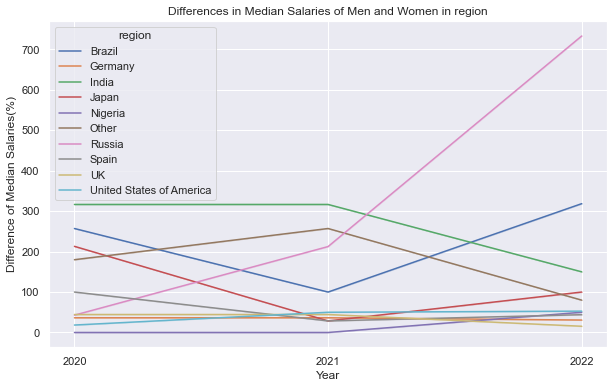

In [19]:
plot_trend(data = plt_data, feature = 'region')

                      region  year gender  salary_int  median_diff
0                     Brazil  2020    Man     12500.0   257.142857
1                     Brazil  2020  Woman      3500.0   257.142857
2                     Brazil  2021    Man     12500.0   100.000000
3                     Brazil  2021  Woman      6250.0   100.000000
4                     Brazil  2022    Man     22500.0   318.604651
5                     Brazil  2022  Woman      5375.0   318.604651
6                    Germany  2020    Man     75000.0    36.363636
7                    Germany  2020  Woman     55000.0    36.363636
8                    Germany  2021    Man     75000.0    36.363636
9                    Germany  2021  Woman     55000.0    36.363636
10                   Germany  2022    Man     85000.0    30.769231
11                   Germany  2022  Woman     65000.0    30.769231
12                     India  2020    Man      6250.0   316.666667
13                     India  2020  Woman      1500.0   316.66

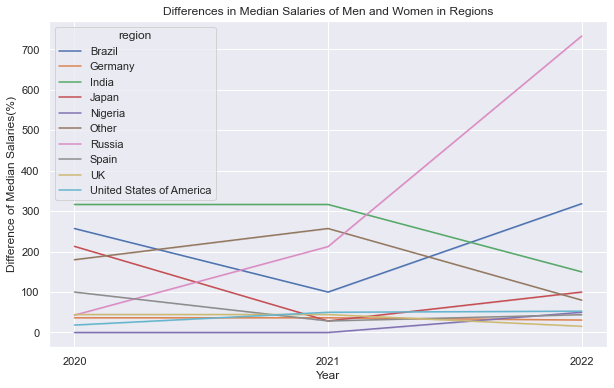

In [20]:
median_values = data.groupby(['region', 'year','gender'])['salary_int'].median().reset_index()
    # Calculate the percentage difference of salary between women and men
median_values['median_diff'] = median_values.groupby(['region','year'])['salary_int'].transform(lambda x: (x.iloc[0] - x.iloc[1]) / x.iloc[1] * 100)
print(median_values)
# 使用Seaborn设置风格
sns.set(style="darkgrid")

# 使用lineplot绘制折线图
plt.figure(figsize=(10, 6))  # 设置图形大小

# 使用hue参数将不同国家的数据区分开来
sns.lineplot(x='year', y='median_diff', hue='region', data=median_values)

# 添加标题和标签
plt.title('Differences in Median Salaries of Men and Women in Regions')
plt.xlabel('Year')
plt.ylabel('Difference of Median Salaries(%)')
plt.xticks([2020, 2021, 2022])

# 显示图形
plt.show()

          highest_edu_lv  year gender  salary_int  median_diff
0   1. Bachelor’s degree  2020    Man      8750.0    94.444444
1   1. Bachelor’s degree  2020  Woman      4500.0    94.444444
2   1. Bachelor’s degree  2021    Man      8750.0   250.000000
3   1. Bachelor’s degree  2021  Woman      2500.0   250.000000
4   1. Bachelor’s degree  2022    Man     12500.0     0.000000
5   1. Bachelor’s degree  2022  Woman     12500.0     0.000000
6     2. Master's degree  2020    Man     27500.0   120.000000
7     2. Master's degree  2020  Woman     12500.0   120.000000
8     2. Master's degree  2021    Man     22500.0   157.142857
9     2. Master's degree  2021  Woman      8750.0   157.142857
10    2. Master's degree  2022    Man     27500.0    57.142857
11    2. Master's degree  2022  Woman     17500.0    57.142857
12    3. Doctoral degree  2020    Man     45000.0   157.142857
13    3. Doctoral degree  2020  Woman     17500.0   157.142857
14    3. Doctoral degree  2021    Man     35000.0   180

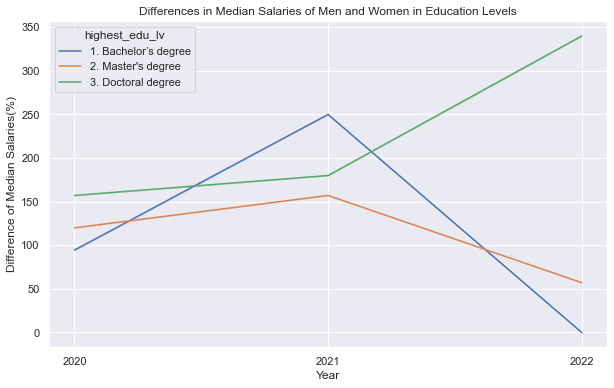

In [21]:
median_values = data.groupby(['highest_edu_lv', 'year','gender'])['salary_int'].median().reset_index()
    # Calculate the percentage difference of salary between women and men
median_values['median_diff'] = median_values.groupby(['highest_edu_lv','year'])['salary_int'].transform(lambda x: (x.iloc[0] - x.iloc[1]) / x.iloc[1] * 100)
print(median_values)
# 使用Seaborn设置风格
sns.set(style="darkgrid")

# 使用lineplot绘制折线图
plt.figure(figsize=(10, 6))  # 设置图形大小

# 使用hue参数将不同国家的数据区分开来
sns.lineplot(x='year', y='median_diff', hue='highest_edu_lv', data=median_values[~median_values['highest_edu_lv'].isin(['Other'])])

# 添加标题和标签
plt.title('Differences in Median Salaries of Men and Women in Education Levels')
plt.xlabel('Year')
plt.ylabel('Difference of Median Salaries(%)')
plt.xticks([2020, 2021, 2022])

# 显示图形
plt.show()

In [22]:
median_values[~median_values['highest_edu_lv'].isin(['Other'])]

,highest_edu_lv,year,gender,salary_int,median_diff
0,1. Bachelor’s degree,2020,Man,8750.0,94.444444
1,1. Bachelor’s degree,2020,Woman,4500.0,94.444444
2,1. Bachelor’s degree,2021,Man,8750.0,250.000000
3,1. Bachelor’s degree,2021,Woman,2500.0,250.000000
4,1. Bachelor’s degree,2022,Man,12500.0,0.000000
5,1. Bachelor’s degree,2022,Woman,12500.0,0.000000
6,2. Master's degree,2020,Man,27500.0,120.000000
7,2. Master's degree,2020,Woman,12500.0,120.000000
8,2. Master's degree,2021,Man,22500.0,157.142857
9,2. Master's degree,2021,Woman,8750.0,157.142857


In [23]:
data = {'Year': [2020, 2021, 2022, 2020, 2021, 2022,2020,2021,2022,
                2020,2021,2022],
        'Country': ['USA', 'USA', 'USA', 'Canada', 'Canada', 'Canada','Canada','Canada','Canada'
                   ,'USA','USA','USA'],
        'Gender': ['Male', 'Female', 'Male', 'Male', 'Female', 'Female','Female','Male','Male'
                  ,'Female','Male','Female'],
        'Salary': [60000, 55000, 62000, 55000, 52000, 58000,59000,61000,62000
                  ,50000,54000,58000]}
data = pd.DataFrame(data)
data

,Year,Country,Gender,Salary
0,2020,USA,Male,60000
1,2021,USA,Female,55000
2,2022,USA,Male,62000
3,2020,Canada,Male,55000
4,2021,Canada,Female,52000
5,2022,Canada,Female,58000
6,2020,Canada,Female,59000
7,2021,Canada,Male,61000
8,2022,Canada,Male,62000
9,2020,USA,Female,50000


In [24]:
# Calculate the median values for each category and gender
median_values = data.groupby(['Country', 'Year','Gender'])['Salary'].median().reset_index()
print(median_values)
    # Calculate the percentage difference of salary between women and men
median_values['median_diff'] = median_values.groupby(['Country','Year'])['Salary'].transform(lambda x: (x.iloc[0] - x.iloc[1]) / x.iloc[1] * 100)
median_values

   Country  Year  Gender   Salary
0   Canada  2020  Female  59000.0
1   Canada  2020    Male  55000.0
2   Canada  2021  Female  52000.0
3   Canada  2021    Male  61000.0
4   Canada  2022  Female  58000.0
5   Canada  2022    Male  62000.0
6      USA  2020  Female  50000.0
7      USA  2020    Male  60000.0
8      USA  2021  Female  55000.0
9      USA  2021    Male  54000.0
10     USA  2022  Female  58000.0
11     USA  2022    Male  62000.0


,Country,Year,Gender,Salary,median_diff
0,Canada,2020,Female,59000.0,7.272727
1,Canada,2020,Male,55000.0,7.272727
2,Canada,2021,Female,52000.0,-14.754098
3,Canada,2021,Male,61000.0,-14.754098
4,Canada,2022,Female,58000.0,-6.451613
5,Canada,2022,Male,62000.0,-6.451613
6,USA,2020,Female,50000.0,-16.666667
7,USA,2020,Male,60000.0,-16.666667
8,USA,2021,Female,55000.0,1.851852
9,USA,2021,Male,54000.0,1.851852


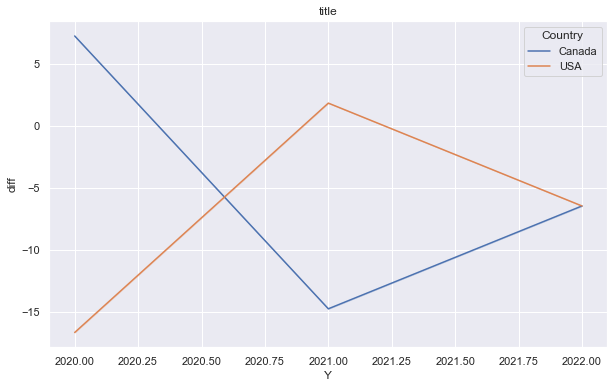

In [25]:
# 使用Seaborn设置风格
sns.set(style="darkgrid")

# 使用lineplot绘制折线图
plt.figure(figsize=(10, 6))  # 设置图形大小

# 使用hue参数将不同国家的数据区分开来
sns.lineplot(x='Year', y='median_diff', hue='Country', data=median_values)

# 添加标题和标签
plt.title('title')
plt.xlabel('Y')
plt.ylabel('diff')

# 显示图形
plt.show()








## 3.3 Statistical tendency

KeyError: 'highest_edu_lv'

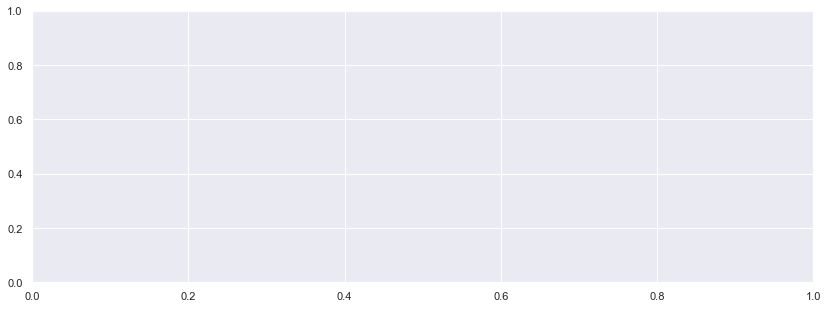

In [26]:
feature_list = ['highest_edu_lv','year_of_coding', 'year_of_ml', 'role_title', 'program_language', 'role_activity', 'machine_learning_lib']
#feature_list = ['highest_edu_lv']
for f in feature_list:
  if f in ('program_language', 'role_activity', 'machine_learning_lib'):
    plt_data = dummy_to_col(data, f, convert_dict)
  else:
    plt_data = data.copy()
  plt_salary_gender(data = plt_data, feature = f)

In [ ]:
for f in feature_list:
  if f in ('program_language', 'role_activity', 'machine_learning_lib'):
    plt_data = dummy_to_col(data, f, convert_dict)
  else:
    plt_data = data.copy()
  visualize_survey_data('2020-2021', metric = f, data=plt_data)